<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 48.8 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
# Check for missing values in critical columns
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values:\n", missing_values)

# Calculate percentage of missing data
missing_percent = (df[['Employment', 'JobSat', 'RemoteWork']].isnull().mean()) * 100
print("\nMissing percentages:\n", missing_percent)

# Fill Employment and JobSat with mode
df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Fill RemoteWork with 'Unknown'
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')

# Verify no more missing values in those columns
final_missing = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing values after cleanup:\n", final_missing)


Missing values:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64

Missing percentages:
 Employment    0.0
JobSat        0.0
RemoteWork    0.0
dtype: float64

Missing values after cleanup:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


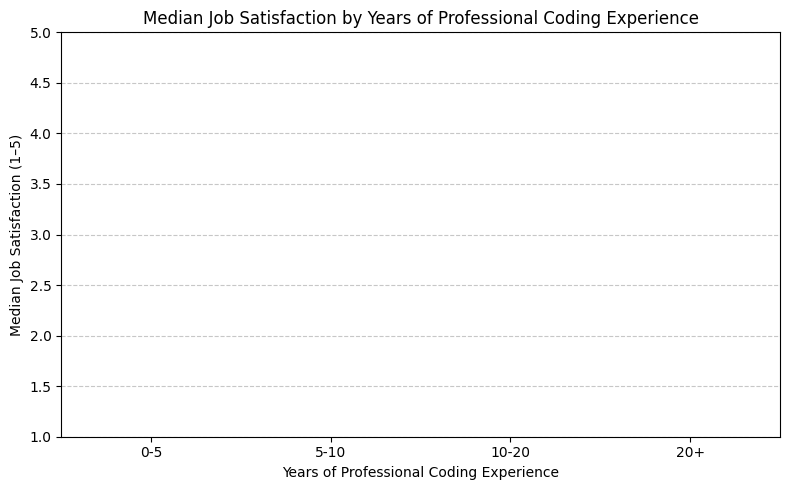

In [8]:
# Replace non-numeric values with numeric equivalents
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# Convert to float
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define bins and labels
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '20+']

# Create a new column for experience range
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Map JobSat to numerical values
job_sat_map = {
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Satisfied': 4,
    'Very satisfied': 5
}
df['JobSatScore'] = df['JobSat'].map(job_sat_map)

# Group by experience range and calculate median JobSat
median_satisfaction = df.groupby('ExperienceRange', observed=True)['JobSatScore'].median().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=median_satisfaction,
    x='ExperienceRange',
    y='JobSatScore',
    hue='ExperienceRange',
    palette='coolwarm',
    legend=False
)
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (1–5)')
plt.ylim(1, 5)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


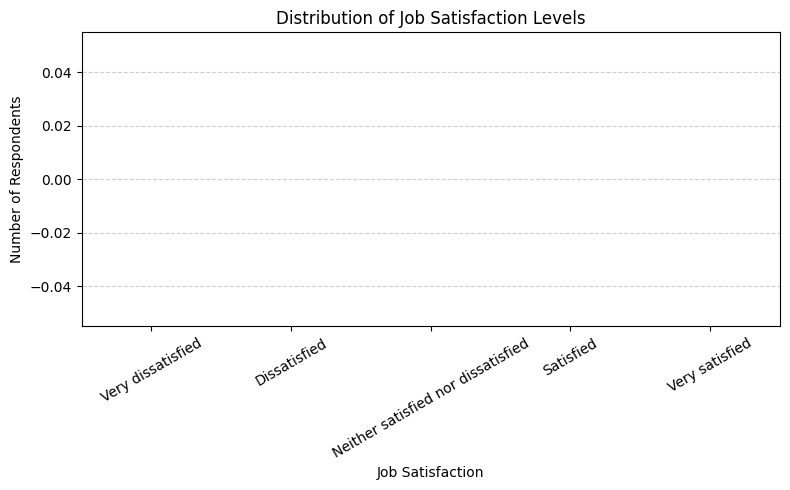

In [10]:
# Set plot style
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='JobSat',
    order=[
        'Very dissatisfied',
        'Dissatisfied',
        'Neither satisfied nor dissatisfied',
        'Satisfied',
        'Very satisfied'
    ],
    hue='JobSat',           # Assign x variable to hue
    palette='viridis',
    legend=False            # Hide redundant legend
)

# Add title and labels
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


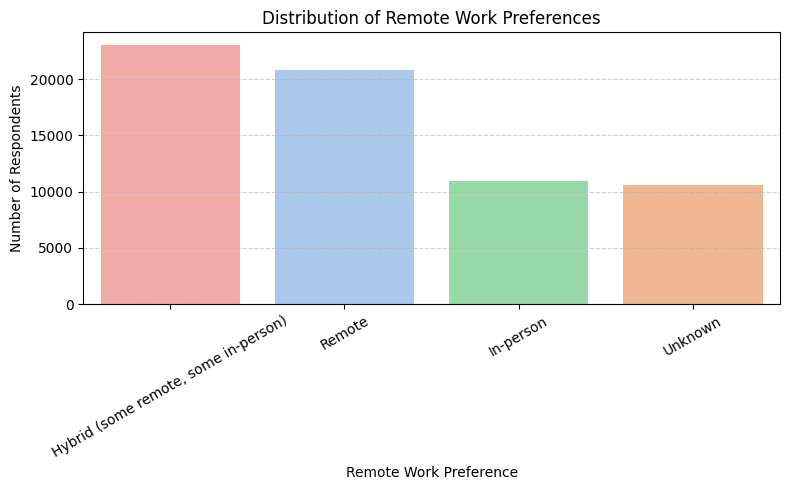

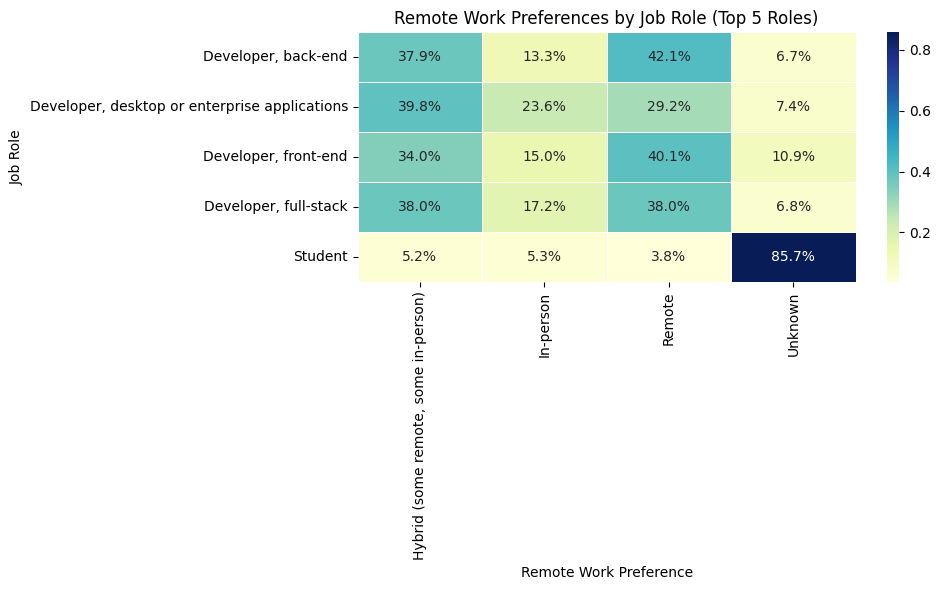

In [11]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='RemoteWork',
    order=df['RemoteWork'].value_counts().index,
    hue='RemoteWork',
    palette='pastel',
    legend=False
)

plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display top 5 job roles for readability (optional)
top_roles = df['DevType'].value_counts().head(5).index

# Filter to only include top job roles
df_filtered = df[df['DevType'].isin(top_roles)]

# Create a cross-tabulation
remote_by_role = pd.crosstab(
    index=df_filtered['DevType'],
    columns=df_filtered['RemoteWork'],
    normalize='index'  # show as percentages
)

# Plot heatmap of the result
plt.figure(figsize=(10, 6))
sns.heatmap(remote_by_role, annot=True, cmap='YlGnBu', fmt=".1%", linewidths=0.5)

plt.title('Remote Work Preferences by Job Role (Top 5 Roles)')
plt.xlabel('Remote Work Preference')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


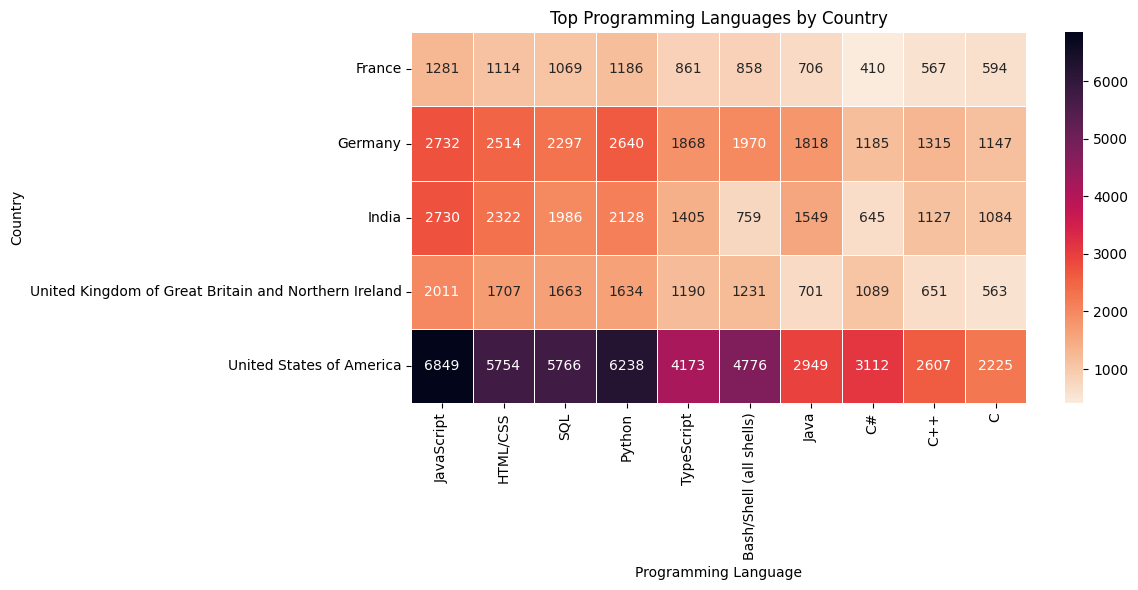

In [12]:
## Write your code here
# Step 7: Analyze Programming Language Trends by Region

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant columns and drop missing values
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Split language strings into lists
df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')

# Explode lists into separate rows
df_exploded = df_lang.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()

# Focus on top 5 countries by number of responses
top_countries = df_exploded['Country'].value_counts().head(5).index
df_filtered = df_exploded[df_exploded['Country'].isin(top_countries)]

# Create cross-tab of country vs. language usage
lang_counts = pd.crosstab(df_filtered['Country'], df_filtered['LanguageList'])

# Select top 10 most popular languages overall
top_languages = df_exploded['LanguageList'].value_counts().head(10).index
lang_counts_top = lang_counts[top_languages]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(lang_counts_top, annot=True, fmt='d', cmap='rocket_r', linewidths=0.5)

plt.title('Top Programming Languages by Country')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


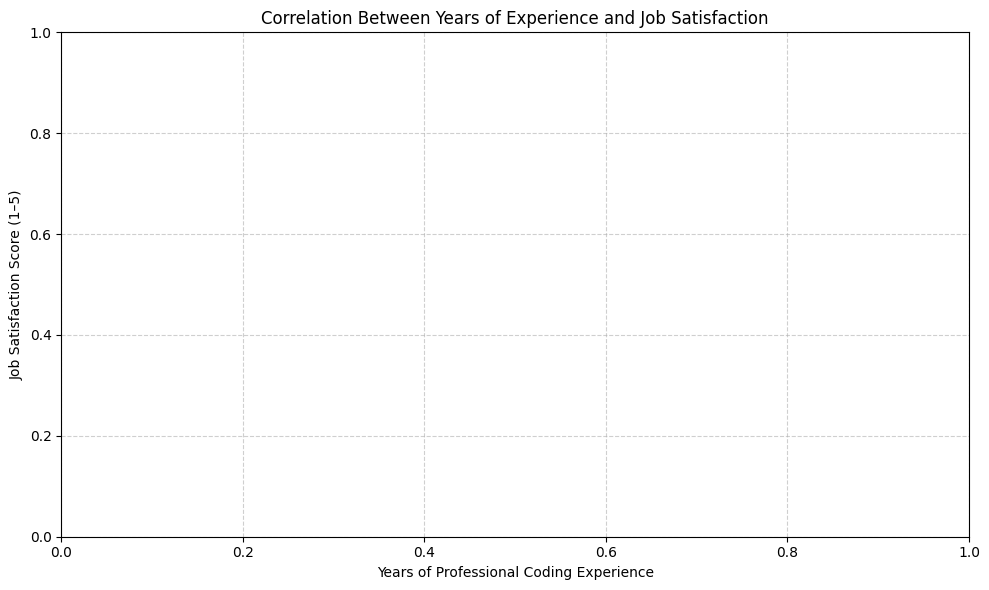

In [13]:
## Write your code here

# Correlation Between Experience and Satisfaction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure YearsCodePro is numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Map JobSat to numeric scores if not already done
job_sat_map = {
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Satisfied': 4,
    'Very satisfied': 5
}
df['JobSatScore'] = df['JobSat'].map(job_sat_map)

# Drop rows with missing values in relevant columns
df_corr = df[['YearsCodePro', 'JobSatScore']].dropna()

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatScore', alpha=0.5, color='mediumseagreen')

# Optional: Add trend line
sns.regplot(data=df_corr, x='YearsCodePro', y='JobSatScore', scatter=False, color='darkgreen', line_kws={"lw":2})

plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (1–5)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_300/1458325103.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=3.0)


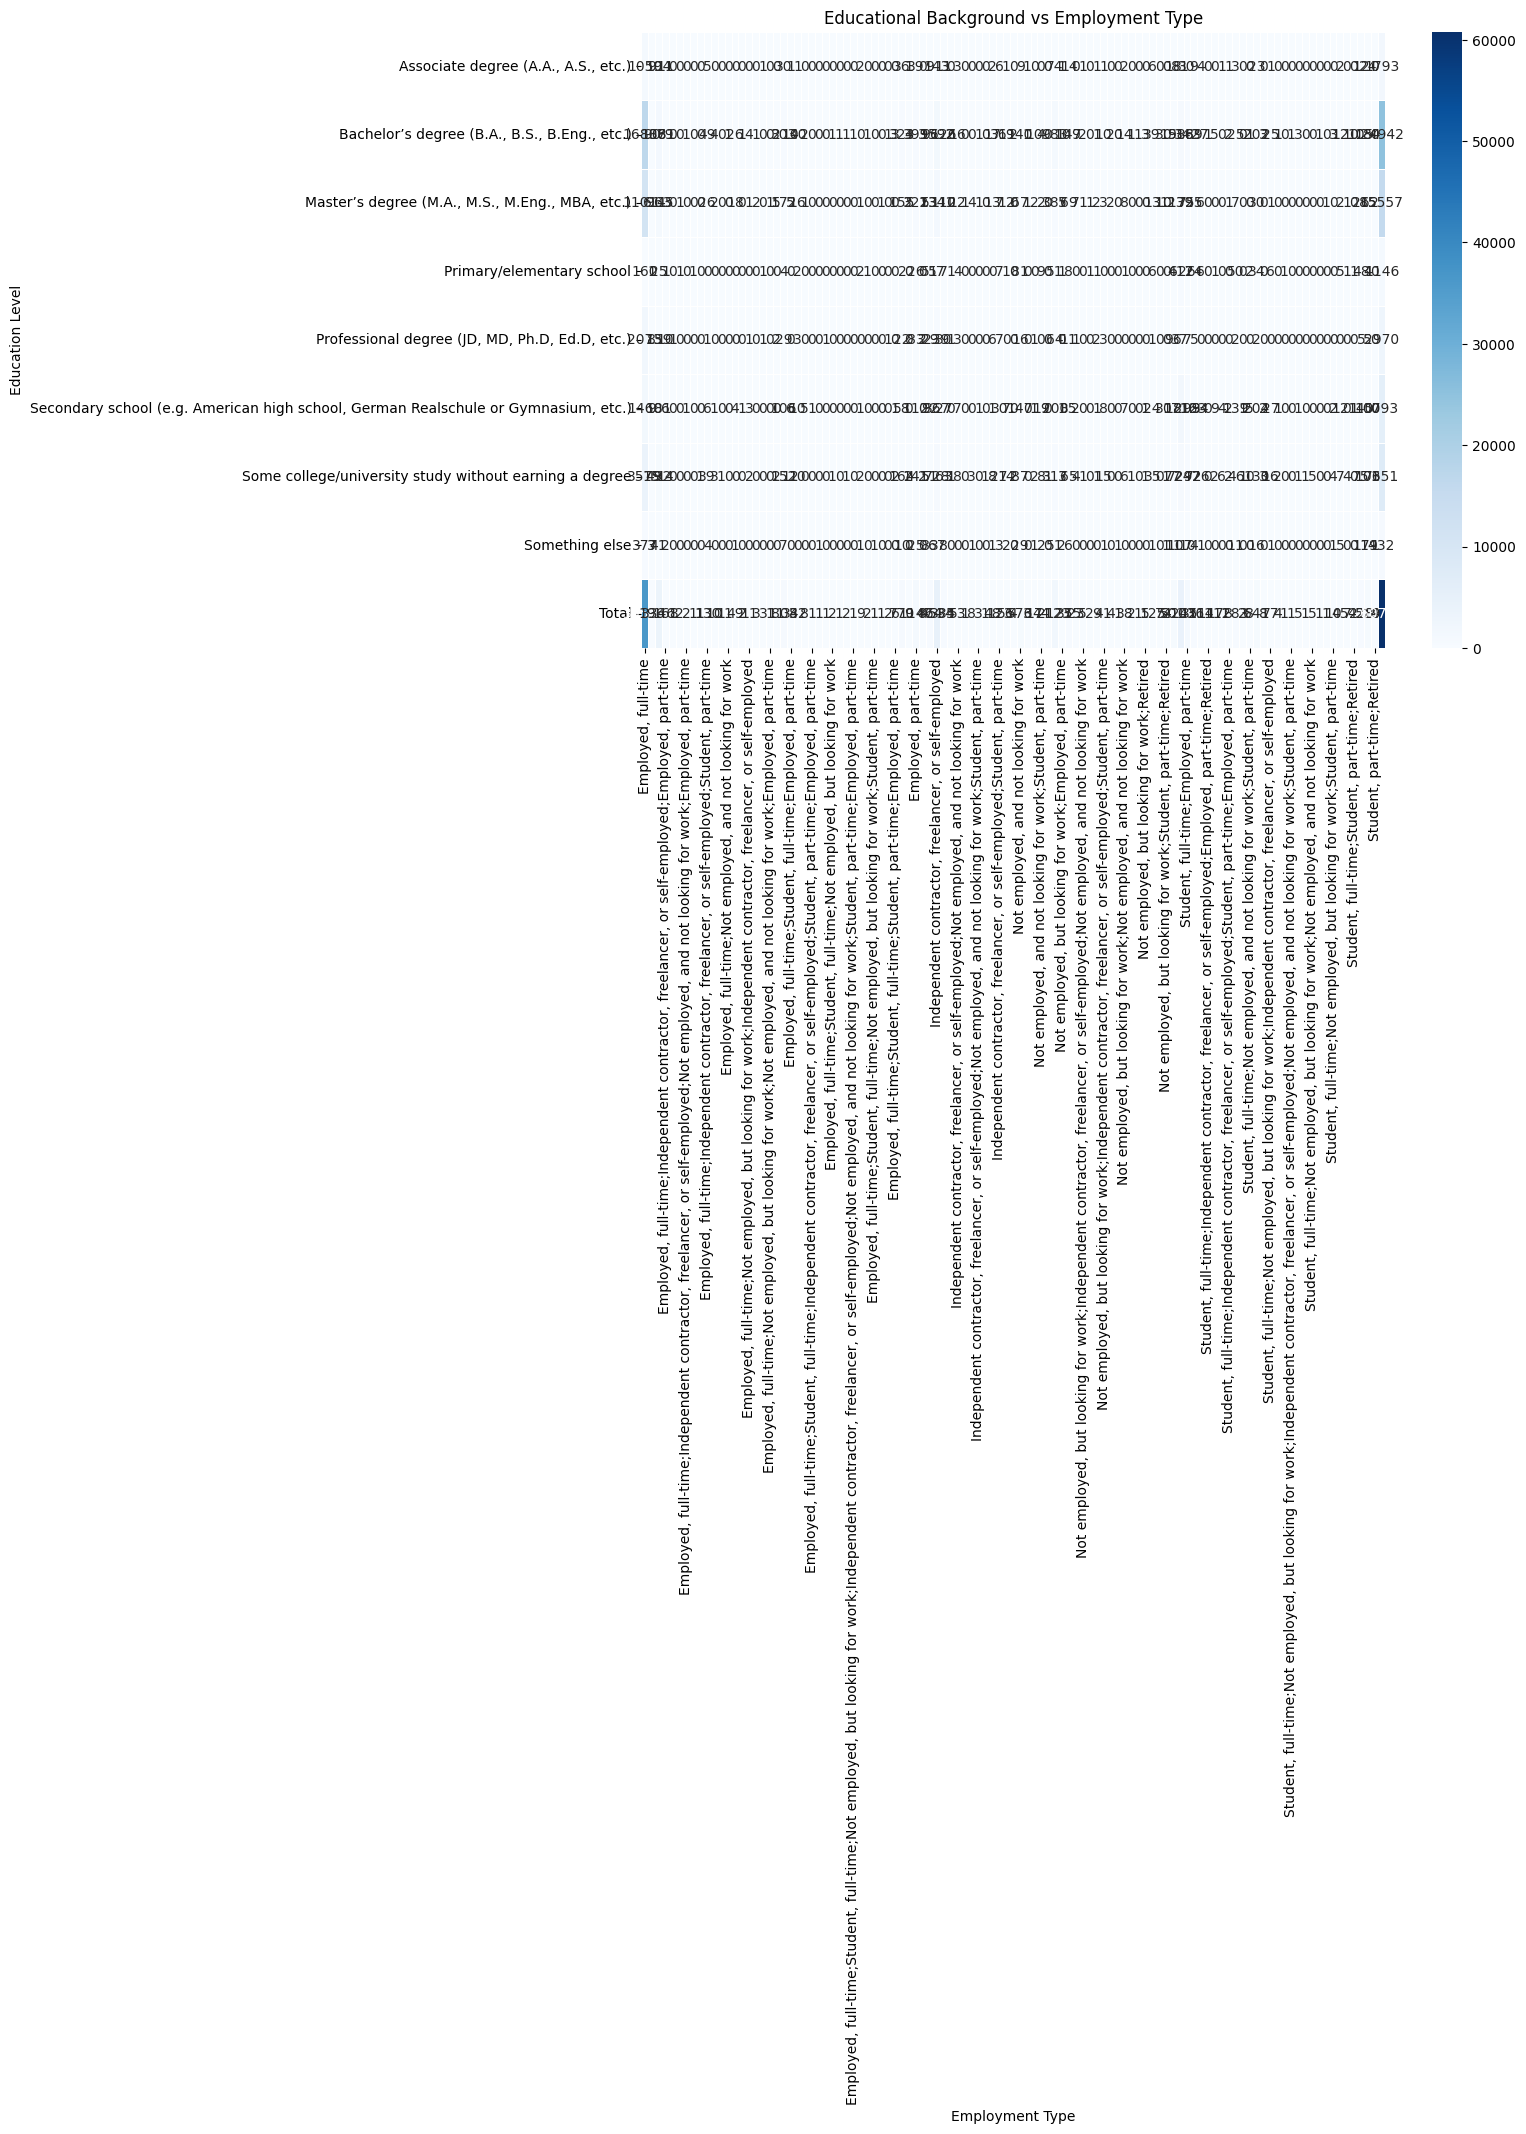

/tmp/ipykernel_300/1458325103.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=3.0)  # Ensure layout fits properly


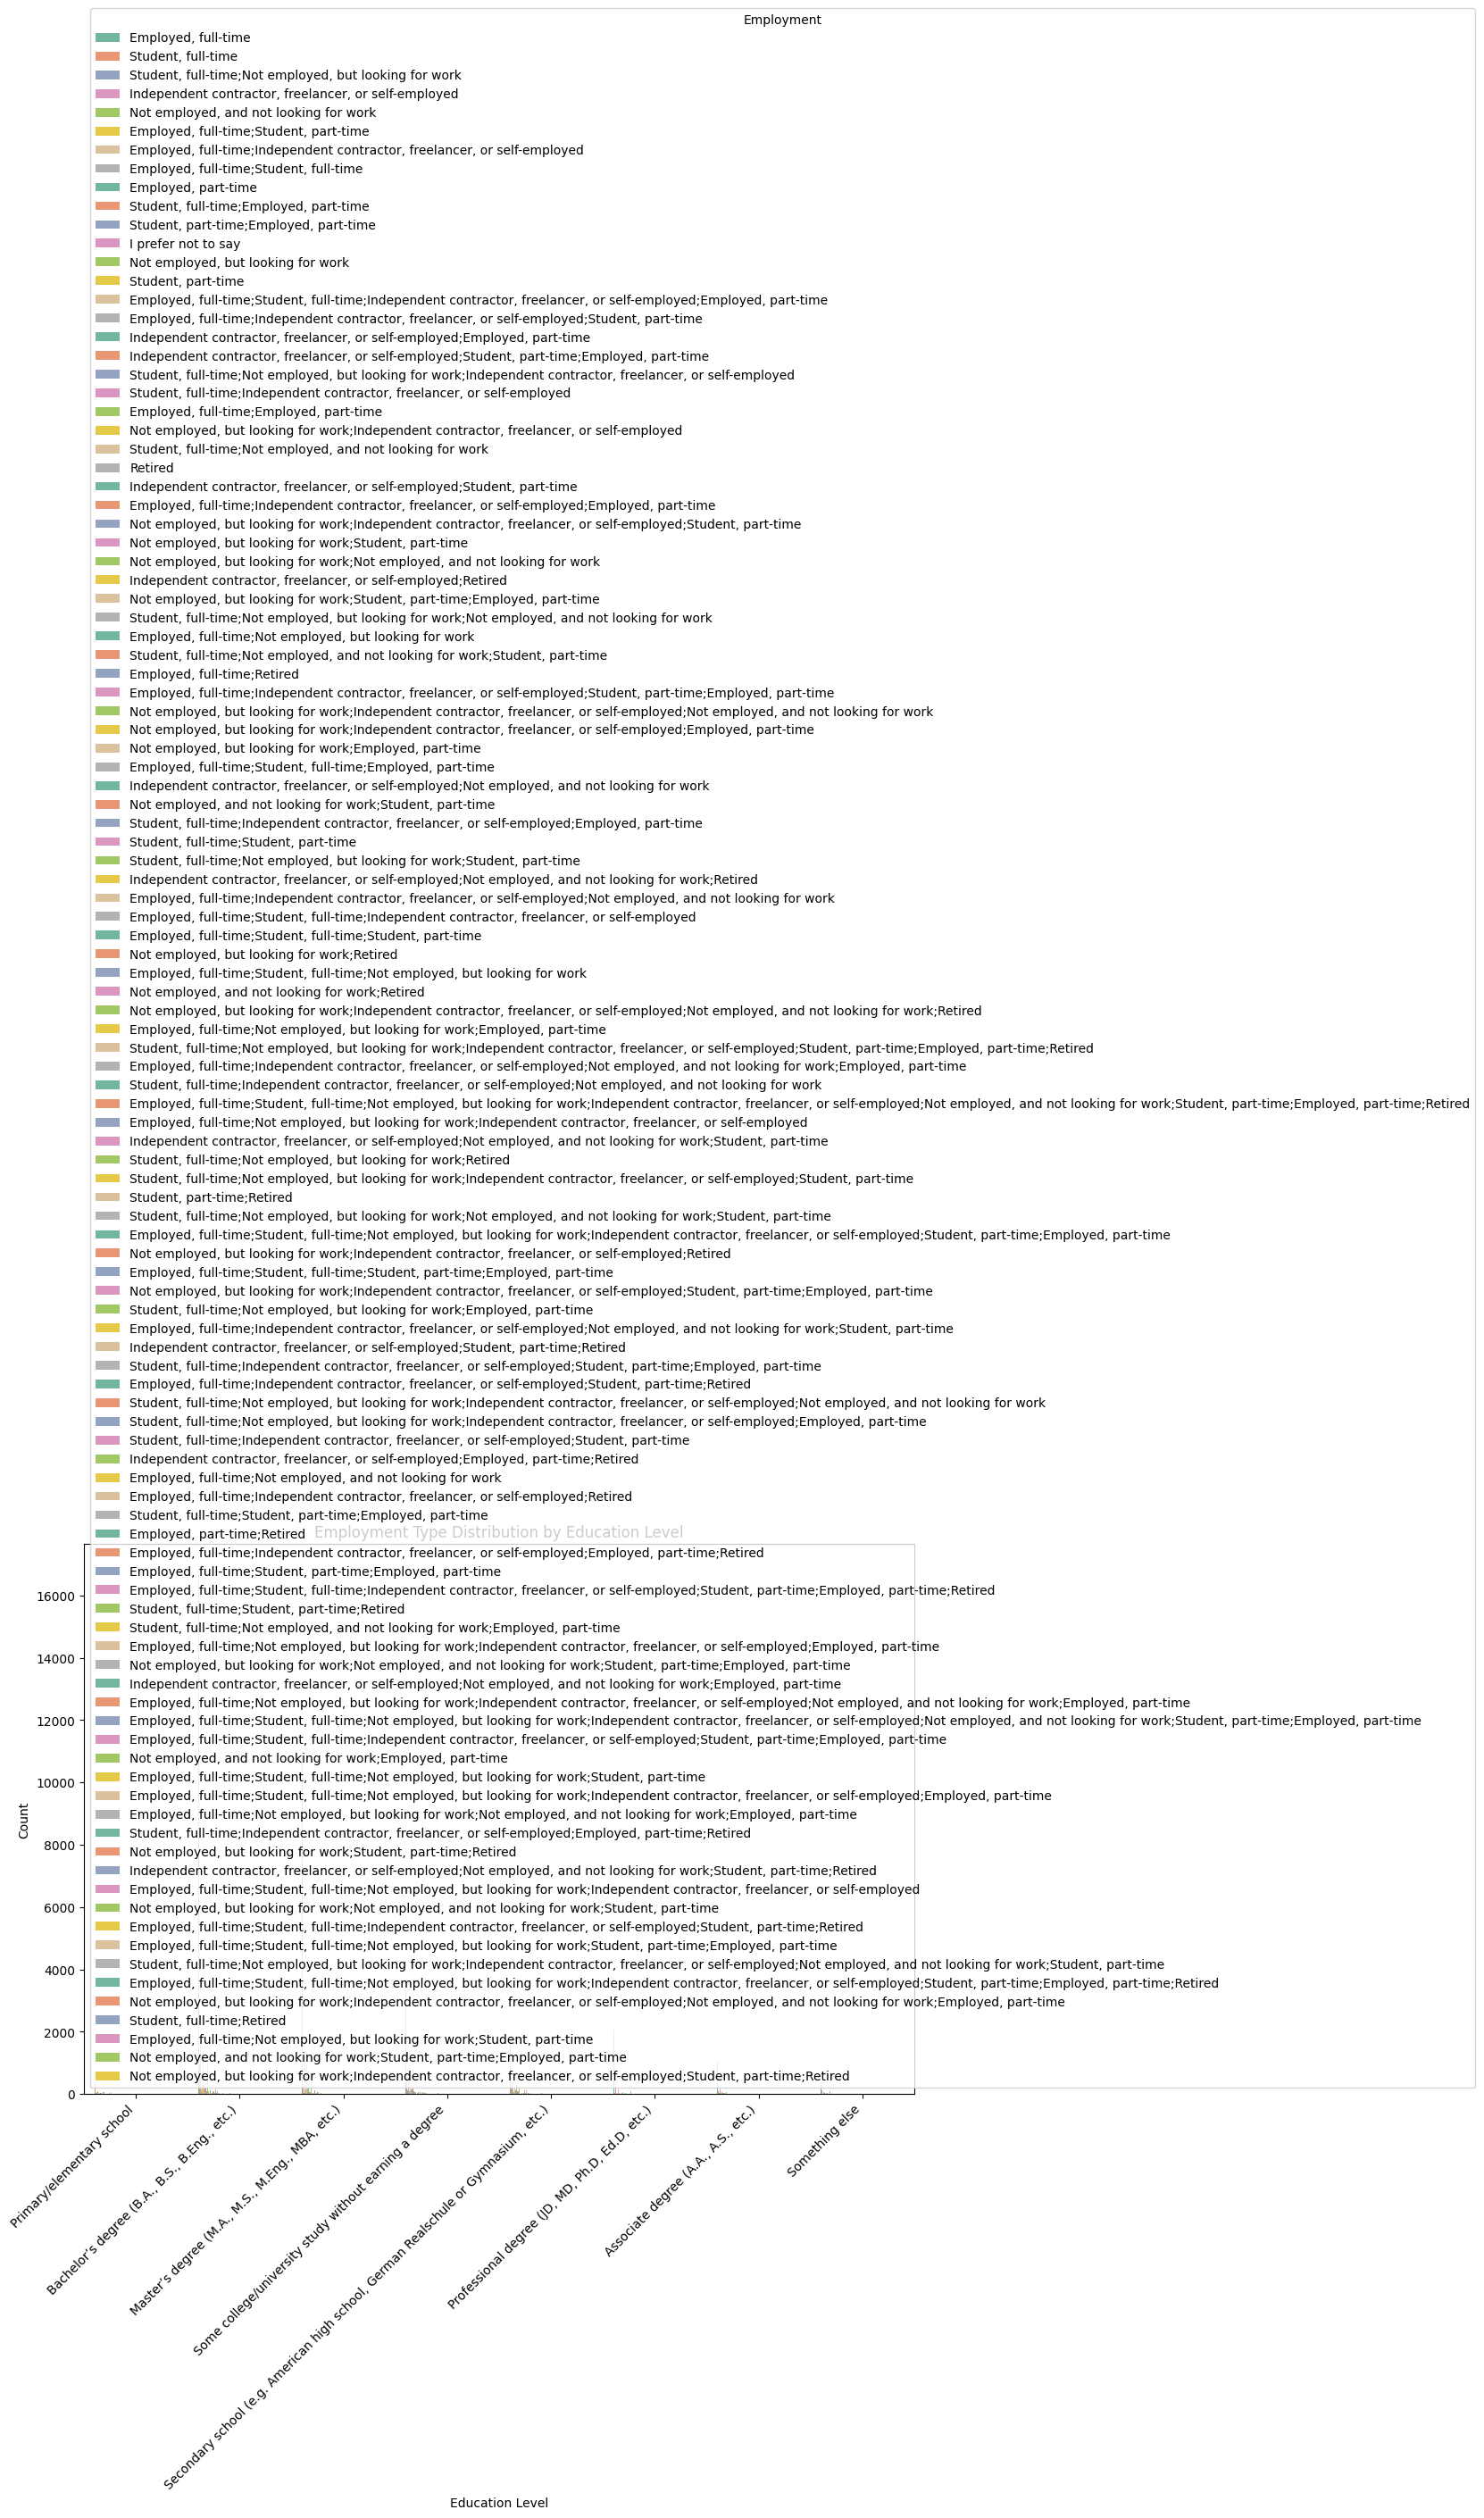

In [15]:
# Plot a heatmap to visualize the relationship
plt.figure(figsize=(12, 8))  # Increase the figure size to make space for labels
sns.heatmap(education_employment_crosstab, annot=True, cmap='Blues', fmt='d', linewidths=0.5)

plt.title('Educational Background vs Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')

# Adjust layout and use padding to ensure everything fits
plt.tight_layout(pad=3.0)
plt.show()

# Plot a barplot for more visualization
plt.figure(figsize=(12, 8))  # Increase the figure size to give room for labels
sns.countplot(data=df, x='EdLevel', hue='Employment', palette='Set2')

plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Rotate x-axis labels and adjust layout to avoid overlap
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)  # Ensure layout fits properly
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [16]:
## Write your code here
# Save the Cleaned and Analyzed Dataset

# Specify the file path where you want to save the dataset
output_file = 'cleaned_and_analyzed_survey_data.csv'

# Save the cleaned and analyzed DataFrame to a CSV file
df.to_csv(output_file, index=False)

print(f"Dataset saved successfully to {output_file}")


Dataset saved successfully to cleaned_and_analyzed_survey_data.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
